In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
# Load cached data
data = np.load('../data/meps/meps-gbr.npz')
X, labels, upper, lower = data['X'], data['y'], data['upper'], data['lower']

In [3]:
# Problem setup
n=1000 # number of calibration points
alpha = 0.1 # 1-alpha is the desired coverage

In [4]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (labels.shape[0]-n)) > 0
np.random.shuffle(idx)
cal_labels, val_labels = labels[idx], labels[~idx]
cal_upper, val_upper = upper[idx], upper[~idx]
cal_lower, val_lower = lower[idx], lower[~idx]
val_X = X[~idx]

In [5]:
# Get scores. cal_upper.shape[0] == cal_lower.shape[0] == n
cal_scores = np.maximum(cal_labels-cal_upper, cal_lower-cal_labels)
# Get the score quantile
qhat = np.quantile(cal_scores, np.ceil((n+1)*(1-alpha))/n, interpolation='higher')
# Deploy (output=lower and upper adjusted quantiles)
prediction_sets = [val_lower - qhat, val_upper + qhat]
print(qhat)

0.4394328964201396


In [6]:
# Calculate empirical coverage
empirical_coverage = ((val_labels >= prediction_sets[0]) & (val_labels <= prediction_sets[1])).mean()
print(f"The empirical coverage is: {empirical_coverage}")

The empirical coverage is: 0.9316698099521253


In [35]:
# Plot intervals
pov_vecs = np.zeros((val_X.shape[0],5))
for pov_lvl in [1,2,3,4,5]:
    one_val = np.unique(val_X[:,-10+pov_lvl]).max()
    pov_vecs[:,pov_lvl-1] = val_X[:,-10+pov_lvl] == one_val
poverty = pov_vecs.dot(np.arange(5)+1).astype(int)

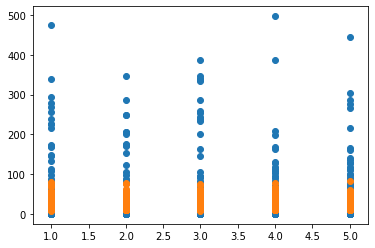

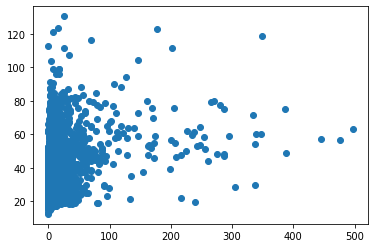

In [52]:
#for pov_lvl in np.unique(poverty):
#    print(np.e**(val_labels[poverty==pov_lvl])-1)
#
plt.figure()
plt.scatter(poverty,np.e**val_labels-1)
plt.scatter(poverty,np.e**val_upper-1)
plt.show()

plt.figure()
plt.scatter(np.e**val_labels-1,np.e**(val_upper+qhat)-1)
plt.show()